In [16]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta
import pandas as pd

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice2  
    where  opendt +:day = dailydate and dailydate < TO_DATE('19/01/01', 'YY/mm/dd') and dailydate > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result

day = 1

def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max_audiacc, prod_max,director_avg,director_max, actors1_max, actors2_max, actors3_max, actors4_max, director_100cnt, prod_avg    
    from movie2
    where opendt < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    
    select_result = pd.read_sql(select_query, db.connection)
    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
#     select_result = db.execute(select_query)
    select_result = pd.read_sql(select_query, db.connection)
    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result


In [3]:
df_week= []
for i in range(0,day):
    df_week_column_name = ['MOVIECD', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )
df_week


첫주 작업 완료. -----


[       MOVIECD  dpeople+0
 0     19820019     102565
 1     20030206       2002
 2     20030248        703
 3     20030316      23992
 4     20030332       1632
 5     20030350      13262
 6     20030371      63289
 7     20030380       1758
 8     20030394       3443
 9     20030395          6
 10    20030396          3
 11    20030397       3488
 12    20030398       4222
 13    20030399       3301
 14    20030402          3
 15    20030404       4143
 16    20030405        731
 17    20030408       6050
 18    20030410      21361
 19    20030411        344
 20    20030412        316
 21    20030413      16490
 22    20030420      10439
 23    20030421       2667
 24    20030424        134
 25    20030425        592
 26    20030426        714
 27    20030430      19141
 28    20030433      40396
 29    20030434       6336
 ...        ...        ...
 2787  20186501     162242
 2788  20186822       8615
 2789  20187427      87322
 2790  20187521       2557
 2791  20187641      61884
 

In [4]:
movie2_dataframe = movie2_dataframe()
movie2_dataframe.tail()

누적 작업 완료. -----


,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG
3253,20189843,481315,NaN,148336,481315,3404477.0,554797.0,481315.0,2849776.0,0,NaN
3254,20189861,111760,NaN,1020008,4100046,3377381.0,4570046.0,111760.0,111760.0,3,NaN
3255,20189869,20989,20989.0,219730,418470,9686269.0,2591058.0,20989.0,20989.0,0,20989.0
3256,20189882,29414,NaN,29414,29414,NaN,NaN,NaN,NaN,0,NaN
3257,20189901,35694,NaN,290310,1008251,5059204.0,2285688.0,NaN,NaN,1,NaN


In [5]:
df_screen = screen_dataframe()
df_screen.tail()

누적 작업 완료. -----


,MOVIECD,SCRNCNT
3019,20199923,116
3020,20199949,72
3021,20199950,1192
3022,20199951,653
3023,20199981,415


In [6]:
df = movie2_dataframe
df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG
3253,20189843,481315,NaN,148336,481315,3404477.0,554797.0,481315.0,2849776.0,0,NaN
3254,20189861,111760,NaN,1020008,4100046,3377381.0,4570046.0,111760.0,111760.0,3,NaN
3255,20189869,20989,20989.0,219730,418470,9686269.0,2591058.0,20989.0,20989.0,0,20989.0
3256,20189882,29414,NaN,29414,29414,NaN,NaN,NaN,NaN,0,NaN
3257,20189901,35694,NaN,290310,1008251,5059204.0,2285688.0,NaN,NaN,1,NaN


In [7]:
df = pd.merge(df,df_screen, on='MOVIECD')

df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
2812,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795
2813,20189843,481315,NaN,148336,481315,3404477.0,554797.0,481315.0,2849776.0,0,NaN,265
2814,20189861,111760,NaN,1020008,4100046,3377381.0,4570046.0,111760.0,111760.0,3,NaN,281
2815,20189869,20989,20989.0,219730,418470,9686269.0,2591058.0,20989.0,20989.0,0,20989.0,240
2816,20189901,35694,NaN,290310,1008251,5059204.0,2285688.0,NaN,NaN,1,NaN,156


In [8]:
for i in df:
    df[i] = df[i].fillna(0)
    
df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
2812,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795
2813,20189843,481315,0.0,148336,481315,3404477.0,554797.0,481315.0,2849776.0,0,0.0,265
2814,20189861,111760,0.0,1020008,4100046,3377381.0,4570046.0,111760.0,111760.0,3,0.0,281
2815,20189869,20989,20989.0,219730,418470,9686269.0,2591058.0,20989.0,20989.0,0,20989.0,240
2816,20189901,35694,0.0,290310,1008251,5059204.0,2285688.0,0.0,0.0,1,0.0,156


In [9]:
# for i in range(0,day) :
#     df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

# df.tail()

In [21]:
# df['MAX_AUDIACC'].describe()
# print(df['MAX_AUDIACC'].quantile(q=0.9, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.8, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.7, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.6, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.5, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.4, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.3, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.2, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0.1, interpolation='nearest'),
#       df['MAX_AUDIACC'].quantile(q=0, interpolation='nearest')
#      )

# for i in range(0,10):
#     print(df['MAX_AUDIACC'].quantile(q=i/100, interpolation='nearest'))

# a = df['MAX_AUDIACC'].quantile(q=0.993, interpolation='nearest')
# b = df['MAX_AUDIACC'].quantile(q=0.965, interpolation='nearest')
# c = df['MAX_AUDIACC'].quantile(q=0.764, interpolation='nearest')
# d = df['MAX_AUDIACC'].quantile(q=0.364, interpolation='nearest')
# e = df['MAX_AUDIACC'].quantile(q=0, interpolation='nearest')
scores = []
for per in range(10, 0, -1):
    scores.append(df['MAX_AUDIACC'].quantile(q=per/10, interpolation='nearest'))
for max_i in df['MAX_AUDIACC']:
    for score in scores:
        if score < max_i:
            
        
df['score'] = score_list
df['score'].head()
# a = 10000000
# b = 5000000
# c = 1000000
# d = 130000
# e = 0

# a = 10000000
# b = 9000000
# c = 8000000
# d = 7000000
# e = 6000000
# f = 5000000
# g = 4000000
# h = 3000000
# i = 2000000
# j = 1000000
# k = 700000
# l= 430000
# m= 260000
# n= 160000
# o= 90000
# p= 50000
# q= 20000
# r=0



# 1% 1000만
# 4% 500만
# 24% 100만
# 65% 13만
# 100% 0

ValueError: Length of values does not match length of index

In [67]:
score_list = []
for max_i in df['MAX_AUDIACC']:
    if max_i >= a:
        score_list.append('A')
    elif max_i >= b:
        score_list.append('B')
    elif max_i >= c:
        score_list.append('C')
    elif max_i >= d:
        score_list.append('D')
    elif max_i >= e:
        score_list.append('E')
    elif max_i >= f:
        score_list.append('F')
    elif max_i >= g:
        score_list.append('G')
    elif max_i >= h:
        score_list.append('H')
    elif max_i >= i:
        score_list.append('I')
    elif max_i >= j:
        score_list.append('J')
    elif max_i >= k:
        score_list.append('J')
    elif max_i >= l:
        score_list.append('J')
    elif max_i >= m:
        score_list.append('J')
    elif max_i >= n:
        score_list.append('J')
    else :
        score_list.append('K')

        
df['score'] = score_list
df['score'].head()

0    K
1    K
2    K
3    K
4    K
Name: score, dtype: object

In [68]:
df.groupby('score')['score'].count()

score
A      20
B       4
C       6
D      18
E      18
F      30
G      44
H      65
I     148
J     307
K    2157
Name: score, dtype: int64

In [69]:
X = df.drop(['MOVIECD', 'MAX_AUDIACC','score'], axis=1)
X.tail()

,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
2812,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795
2813,0.0,148336,481315,3404477.0,554797.0,481315.0,2849776.0,0,0.0,265
2814,0.0,1020008,4100046,3377381.0,4570046.0,111760.0,111760.0,3,0.0,281
2815,20989.0,219730,418470,9686269.0,2591058.0,20989.0,20989.0,0,20989.0,240
2816,0.0,290310,1008251,5059204.0,2285688.0,0.0,0.0,1,0.0,156


In [70]:
Y=df['score']

In [71]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.15,  random_state=999)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)

(1.0, 0.9267139479905437)

In [73]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth' : [3,4,5,6],
    'learning_rate' : [0.1,0.15, 0.2, 0.25, 0.3]
}

grid_cv_gbc = GridSearchCV(gbc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_gbc.fit(X_train, y_train.values)
gbc_best = grid_cv_gbc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_gbc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_gbc.best_score_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.2s finished


최적 하이퍼 파라미터: 
 {'learning_rate': 0.3, 'max_depth': 4}
최고 예측 정확도: 0.9072


In [74]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=10, learning_rate=0.15)
adb.fit(X_train,y_train)
adb.score(X_train,y_train),adb.score(X_test,y_test)

(0.7838660578386606, 0.7600472813238771)

In [75]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50],
    'learning_rate' : [0.1,0.15, 0.2]
}

grid_cv_adb = GridSearchCV(adb, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_adb.fit(X_train, y_train.values)
adb_best = grid_cv_adb.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_adb.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_adb.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.1s remaining:    0.1s


최적 하이퍼 파라미터: 
 {'n_estimators': 30, 'learning_rate': 0.1}
최고 예측 정확도: 0.8042


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [76]:
rfc = RandomForestClassifier(n_estimators=80, random_state=999)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(1.0, 0.9314420803782506)

In [77]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100]
}

grid_cv_rfc = GridSearchCV(rfc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_rfc.fit(X_train, y_train.values)
rfc_best = grid_cv_rfc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_rfc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_rfc.best_score_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.3s


최적 하이퍼 파라미터: 
 {'n_estimators': 90}
최고 예측 정확도: 0.9061


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


In [78]:
from sklearn.metrics import accuracy_score
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred_gbc = grid_cv_gbc.best_estimator_.predict(X_test)
gb_accuracy_gbc = accuracy_score(y_test, gb_pred_gbc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_gbc))

gb_pred_adb = grid_cv_adb.best_estimator_.predict(X_test)
gb_accuracy_adb = accuracy_score(y_test, gb_pred_adb)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_adb))

gb_pred_rfc = grid_cv_rfc.best_estimator_.predict(X_test)
gb_accuracy_rfc = accuracy_score(y_test, gb_pred_rfc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_rfc))

GBM 정확도: 0.9338
GBM 정확도: 0.7636
GBM 정확도: 0.9314


In [79]:
from sklearn.ensemble import VotingClassifier
votigC = VotingClassifier(estimators=[
    ('gbc',gbc_best),('adb',adb_best),('rfc',rfc_best)], voting='hard', n_jobs=3 )
votigC = votigC.fit(X_train,y_train) 
#예측진행
prediction = votigC.predict(X_test)
prediction

array(['K', 'K', 'H', 'K', 'J', 'K', 'I', 'A', 'K', 'K', 'K', 'K', 'K',
       'K', 'I', 'K', 'K', 'K', 'J', 'K', 'K', 'K', 'I', 'K', 'J', 'K',
       'K', 'K', 'K', 'K', 'G', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K',
       'K', 'E', 'K', 'J', 'K', 'H', 'K', 'K', 'K', 'K', 'H', 'K', 'K',
       'K', 'K', 'K', 'K', 'J', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'I',
       'G', 'K', 'K', 'J', 'G', 'J', 'K', 'K', 'K', 'J', 'K', 'J', 'K',
       'K', 'K', 'K', 'K', 'K', 'K', 'K', 'I', 'J', 'K', 'K', 'K', 'K',
       'K', 'K', 'K', 'K', 'K', 'J', 'J', 'K', 'K', 'D', 'K', 'J', 'K',
       'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K',
       'K', 'J', 'K', 'J', 'K', 'K', 'K', 'K', 'K', 'J', 'K', 'K', 'K',
       'K', 'K', 'K', 'K', 'K', 'K', 'K', 'A', 'K', 'K', 'J', 'K', 'K',
       'K', 'J', 'K', 'K', 'J', 'F', 'I', 'K', 'K', 'H', 'K', 'K', 'K',
       'K', 'K', 'K', 'J', 'K', 'J', 'K', 'K', 'K', 'G', 'K', 'K', 'K',
       'K', 'K', 'I', 'K', 'K', 'J', 'K', 'K', 'I', 'K', 'K', 'K

In [80]:
# type(prediction)
confusion_matrix(y_test,prediction, labels=["A","B","C","D","E","F","G","H","I","J","K"])

array([[  7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1,   4,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   3,   5,   0,   1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   6,   1,   0,   1,   0,   1],
       [  0,   0,   0,   0,   0,   1,   9,   2,   0,   2,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   1,   0,  38,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   1,   4,  79,  19],
       [  0,   0,   0,   0,   0,   0,   0,   2,   4,   6, 618]],
      dtype=int64)

In [81]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 보팅한 컨퓨전매트릭스
conMat = pd.DataFrame(confusion_matrix(y_test,prediction),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]', 'True[E]', 'True[F]', 'True[G]', 'True[H]', 'True[I]', 'True[J]', 'True[K]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[E]', 'Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[I]', 'Pred[J]', 'Pred[K]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[E],Pred[F],Pred[G],Pred[H],Pred[I],Pred[J],Pred[K]
True[A],7,0,0,0,0,0,0,0,0,0,0
True[B],2,0,0,1,0,0,0,0,0,0,0
True[C],1,0,1,0,0,0,0,0,0,0,0
True[D],1,0,1,4,0,0,0,0,0,0,1
True[E],0,0,0,3,5,0,1,0,0,0,0
True[F],1,0,0,0,1,6,1,0,1,0,1
True[G],0,0,0,0,0,1,9,2,0,2,0
True[H],0,0,0,0,0,1,0,17,0,0,0
True[I],0,0,0,1,1,0,1,0,38,0,0
True[J],0,0,0,1,0,0,0,1,4,79,19


In [82]:
gb_accuracy_voting = accuracy_score(y_test, prediction)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))

GBM 정확도: 0.9267


In [84]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc.fit(X_train, y_train) #랜덤포레스트의 컨퓨전 매트릭스

y_pred = rfc.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                        index=['True[A]', 'True[B]', 'True[C]', 'True[D]', 'True[E]', 'True[F]', 'True[G]', 'True[H]', 'True[I]', 'True[J]', 'True[K]'],
                        columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[E]', 'Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[I]', 'Pred[J]', 'Pred[K]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[E],Pred[F],Pred[G],Pred[H],Pred[I],Pred[J],Pred[K]
True[A],6,0,0,0,0,0,0,0,0,0,1
True[B],1,0,2,0,0,0,0,0,0,0,0
True[C],1,0,1,0,0,0,0,0,0,0,0
True[D],1,0,2,4,0,0,0,0,0,0,0
True[E],0,0,0,3,6,0,0,0,0,0,0
True[F],1,0,0,0,1,7,1,0,1,0,0
True[G],0,0,0,0,0,1,10,2,0,1,0
True[H],0,0,0,0,0,1,1,16,0,0,0
True[I],0,0,0,0,1,0,0,1,38,1,0
True[J],0,0,0,0,0,0,0,1,4,85,14


In [85]:
feat_labels = X.columns
feat_labels

Index(['PROD_MAX', 'DIRECTOR_AVG', 'DIRECTOR_MAX', 'ACTORS1_MAX',
       'ACTORS2_MAX', 'ACTORS3_MAX', 'ACTORS4_MAX', 'DIRECTOR_100CNT',
       'PROD_AVG', 'SCRNCNT'],
      dtype='object')

 1) DIRECTOR_AVG                   0.111362
 2) SCRNCNT                        0.085541
 3) ACTORS4_MAX                    0.158368
 4) DIRECTOR_MAX                   0.216593
 5) PROD_MAX                       0.043144
 6) ACTORS3_MAX                    0.104879
 7) ACTORS2_MAX                    0.099982
 8) PROD_AVG                       0.034807
 9) ACTORS1_MAX                    0.062021
10) DIRECTOR_100CNT                0.083303


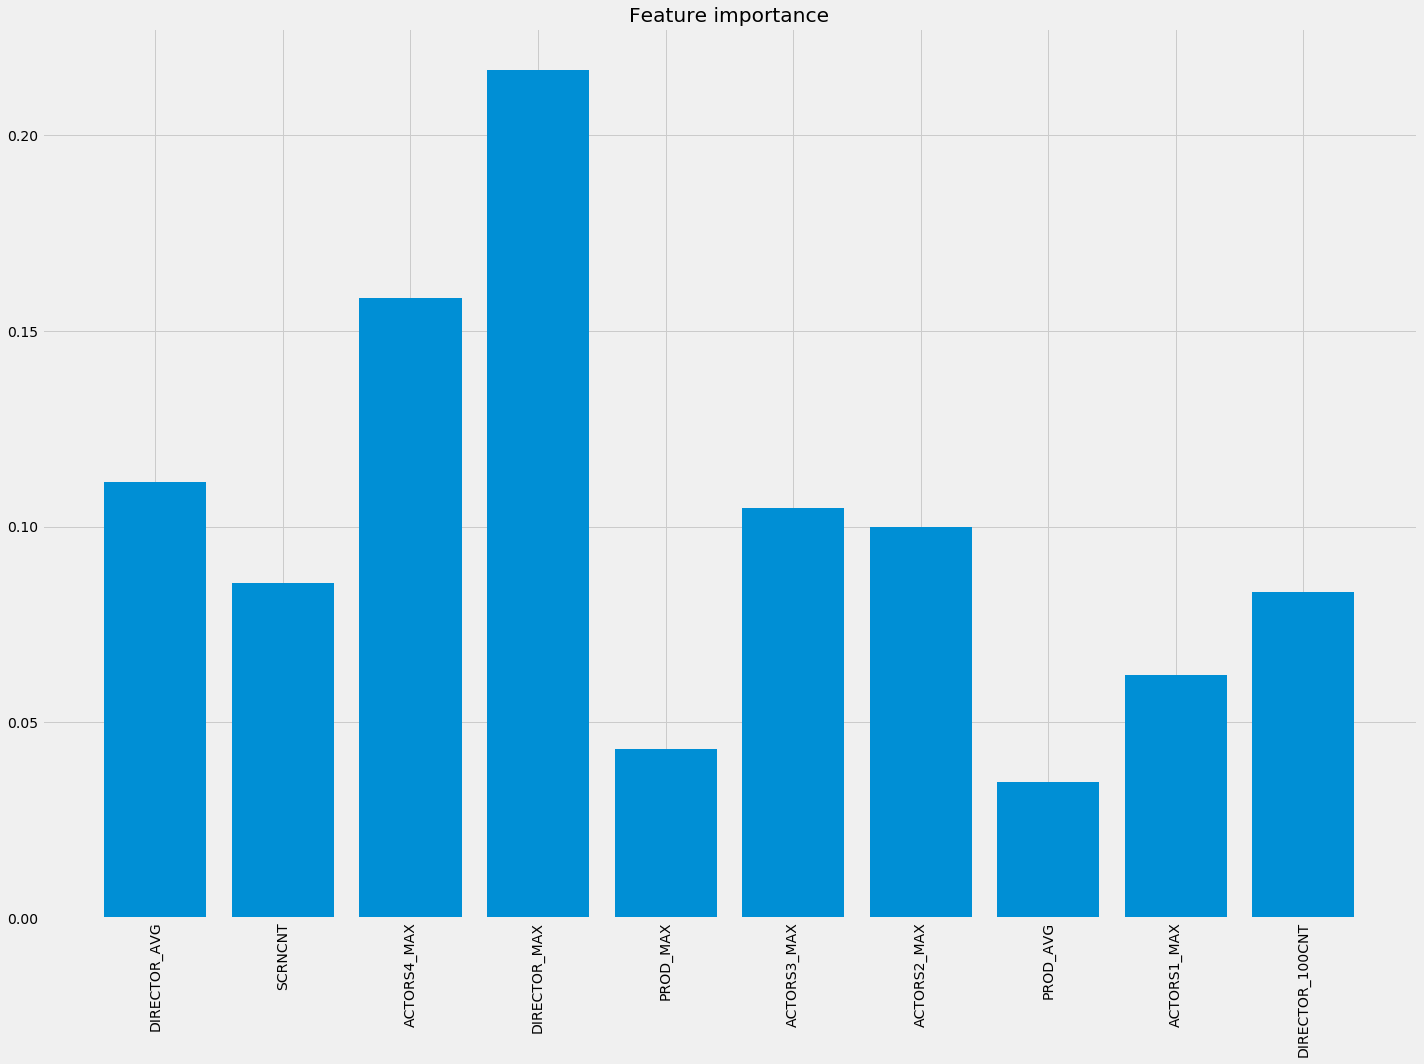

In [86]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))
                 
importances = rfc.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.savefig('randomforest.png')
plt.show()

In [ ]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음